# Projet Numérique : câble sous-marin

#### GUITET Quentin et PLESSIER Aymeric 

# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star= \frac{1}{K} \sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?


---

Soit des variables aléatoires $X$ et $Y$ et on cherche à estimer l'espérance de la variable aléatoire $Z$ qui suit la loi de $X$ sachant l'événement $\left\{Y=y\right\}$, c'est-à-dire qu'on veut estimer la quantité $\mathbb{E}(X|Y=y)$. 
Pour $y$ fixé, on considère une suite de réalisations $(Z_i)_{i \in \mathbb{N}}$, toutes indépendantes et suivant la même loi que $Z$ et intégrables.
Alors, d'aprés la loi forte des grands nombres, la variable aléatoire 

$$M_n= \frac{Z_0+ \dots+ Z_n}{n}$$ 

correspondant à la moyenne empirique tend presque sûrement, lorsque $n$ tend vers l'infini, vers l'espérance de $Z$, soit

$$M_n= \frac{Z_0+ \dots+ Z_n}{n} \overset{p.s.}{\underset{n \rightarrow \infty}{\rightarrow}} \mathbb{E}(Z) = \mathbb{E}(X|Y=y)$$

---

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

---
On considère le vecteur aléatoire gaussien $\mathbf{Z} = \big(Z(x_0), \dots, Z(x_N)\big)$ de taille $N$, de vecteur espérance $\mu$ et de matrice de covariance $\Sigma_Z$.

On pose le vecteur alétoire des observations prenant une valeur particulière $\mathbf{O} = \big(z(x_{j_1}), \dots, z(x_{j_n})\big) = z$ de taille $n$.

On pose $p = N - n + 1$, et on pose aussi le vecteur aléatoire des points de discrétisation sans observation, c'est-à-dire le vecteur des cotes inconnues $\mathbf{Z}_i = \big(z(x_{k_1}), \dots, z(x_{k_p})\big) = \big(z(x_0), \dots, \hat{z}(x_{j_1}), \dots, \hat{z}(x_{j_n}), \dots, z(x_N)\big)$, le vecteur $\mathbf{Z}_i$ est donc le vecteur $\mathbf{Z}$ privé des cotes en les points d'observations $z(x_{j_i})_{i \le n}$, soit le vecteur $\mathbf{Z}$ en les points inconnus notés $z(x_{k_i})_{i \le p}$. Le vecteur $\mathbf{Z}_i$ est donc de taille $p$.

On notera aussi $\Sigma_O$ la matrice de coavariance de $\mathbf{O}$, soit la matrice de covariance entre les observations, on notera $\Sigma_{Z_i}$ la matrice de covariance de $\mathbf{Z}_i$, et on notera $\Sigma_{O,Z_i}$ la matrice de covariance entre les observations et les inconnues.

On cherche à determiner la loi suivie par la variable aléatoire $\mathbf{Y}$ qui suit la loi du vecteur $\mathbf{Z}$ sachant que $\mathbf{O}=z$.

D'aprés le cours sur les vecteurs gaussiens à densité, le vecteur aléatoire $\mathbf{Y}$ est aussi gaussien et est déterminé par son vecteur espérance $\mathbb{E}(\mathbf{Y})$ et sa matrice de covariance $\Sigma_Y$ dont les expressions sont les suivantes :

$$ \mathbb{E}(\mathbf{Y}) = \mathbb{E}(\mathbf{Z}_i) + \Sigma_{O,Z_i}^t \cdot \Sigma_O ^{-1} \big(z - \mathbb{E}(\mathbf{O}) \big) $$

$$ \Sigma_Y = \Sigma_{Z_i}- \Sigma_{O,Z_i}^t\cdot \Sigma_O ^{-1} \cdot \Sigma_{O,Z_i} $$

---

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

---
Si $\mathbf{Y}$ est un vecteur gaussien centré et réduit, alors, d'après le cours sur la simulation d'un vecteur gaussien, le vecteur aléatoire $\mathbf{Z}$ défini par $\mathbf{Z}=m+R\mathbf{Y}$ est un vecteur gaussien tel que :

$$ \mathbb{E}(\mathbf{Z}) = m $$
$$ \mathbb{V}(\mathbf{Z}) = R \cdot R^t $$

---

4. En déduire un algorithme de simulation conditionnelle.

---
On souhaite écrire un algorithme dont l'objectif est de simuler un vecteur gaussien $\mathbf{Y}$ suivant la loi de la variable $\mathbf{Z}$ sachant que $\mathbf{O}=z$. D'aprés la question 2, cela revient à simuler un vecteur gaussien $\mathbf{Y}$ tel que 

$$ \mathbb{E}(\mathbf{Y}) = \mathbb{E}(\mathbf{Z}_i) + \Sigma_{O,Z_i}^t \cdot \Sigma_O ^{-1} \big(z - \mathbb{E}(\mathbf{O}) \big) $$

$$ \Sigma_Y = \Sigma_{Z_i}- \Sigma_{O,Z_i}^t\cdot \Sigma_O ^{-1} \cdot \Sigma_{O,Z_i} $$

Pour simuler un tel vecteur, on propose l'algorithme suivant.

Entrées :

$\rightarrow$ Les points d'obseravtion $x_{j_1},\dots,x_{j_n}$ \
$\rightarrow$ Les observations en ces points $z = (z(x_{j_1}),\dots,z(x_{j_n}))$ \
$\rightarrow$ La moyenne des mesures $\mu$ \
$\rightarrow$ Les points de discrétisation $x_0,\dots,x_N$ \
$\rightarrow$ La fonction $C$ pour le calcul des matrices de covariance

Algorithme :

$\rightarrow$ On simule un vecteur gaussien centré réduit $\mathbf{T} =(T_0, \dots , T_N)$ \
$\rightarrow$ On calcule $\Sigma_Y = \Sigma_{Z_i}- \Sigma_{O,Z_i}^t\cdot \Sigma_O ^{-1} \cdot \Sigma_{O,Z_i}$ à partir de la fonction $C$ et des abscisses de discrétisation \
$\rightarrow$ On effectue la décomposition de Cholesky de la matrice $\Sigma_Y$ afin d'obtenir $R$ triangulaire inférieure telle que $\Sigma_Y = R \cdot R^t$ \
$\rightarrow$ On calcule $\mathbb{E}(\mathbf{Y}) = \mathbb{E}(\mathbf{Z}_i) + \Sigma_{O,Z_i}^t \cdot \Sigma_O ^{-1} \big(z - \mathbb{E}(\mathbf{O}) \big)$ sachant que l'espérance des observations est calculée selon la moyenne empirique $\mathbb{E}(\mathbf{O}) = \frac{1}{n} \sum_{i=1}^n x_{j_i}$

Sortie :

$\rightarrow$ On renvoie $\mathbf{Y} = \mathbb{E}(\mathbf{Y}) + R \cdot \mathbf{T}$

---

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [2]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

# On rajoute ici une fonction auxiliaire qui sera utile par la suite, pour afficher les résultats des simulations

def fusion(i,o,observation_indexes=observation_indexes) :
    """Effectue une fusion de deux vecteurs aleatoires, l'un des valeurs mesurees,
    l'autre des valeurs simulees / des esperances simulees. Sert pour l'affichage notamment."""
    N = i.shape[0]+o.shape[0]
    n = o.shape[0]
    sortie = np.zeros(N)
    sauts = 0
    for j in range(N) :
        if sauts<n and observation_indexes[sauts]==j :
            sortie[j] = o[sauts]
            sauts+=1
        else :
            sortie[j] = i[j-sauts]
    return sortie


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [3]:
#On definit la fonction C prenant en argument la distance h, et les parametres a et sigma2

def C(h, a=a, sigma2=sigma2):
    return sigma2*np.exp(-h/a)

#On vectorise la fonction afin de pouvoir l'appliquer à une matrice des disatnces D et obtenir la matrice de covariance

Cov = np.vectorize(C)

2. Calculer la matrice de distance.

In [4]:
#On appelle la matrice de distance entre les inconnues distances_z

distances_z = np.zeros((N,N),dtype=np.float64)

for i in range(N) :
    for j in range(N) :
        distances_z[i,j] = abs(discretization[i]-discretization[j])
        
distances_z

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [5]:
sigma_z = C(distances_z) # matrice de covariance de Z

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [6]:
# on extrait les matrices de covariance

sigma_o = sigma_z[observation_indexes][:,observation_indexes] # matrice de covariance de O (observations)
sigma_i = sigma_z[unknown_indexes][:,unknown_indexes] # matrice de covariance correpondant aux inconnues
sigma_oz = sigma_z[observation_indexes][:,unknown_indexes] # matrice de covariance entre les observations et les inconnues


5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

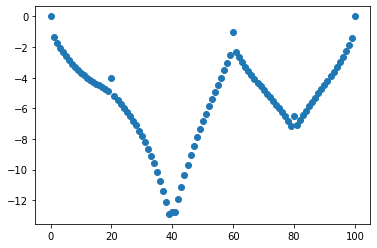

In [7]:
#On calcule l'espérance EY de la loi de la variable Y de la question 4. de la première partie 

n = len(depth)

EO = depth.mean()*np.ones(n) # moyenne empirique des observations

EY = mu * np.ones(N-n) + np.dot(np.matrix.transpose(sigma_oz), np.dot(np.linalg.inv(sigma_o), depth - EO))

plt.scatter(np.arange(N), fusion(EY,depth))
plt.show()

Remarque : le résultat obtenu est assez surprenant

On peut essayer d'expliquer ce résultat surprenant, où les points de mesures semblent décalés en moyenne par rapport au reste. 

En effet, on fait une hypothèse de stationnarité sur le fond marin, dont la profondeur vaut en moyenne $\mu$, mais dans le contexte de l'exercice, cette moyenne ne pourrait être accessible qu'à partir des obseravtions effectuées, on prendrait donc naturellement comme moyenne celle des observations, à défaut d'avoir accès à d'autres données. On choisirait alors $\mu = \frac{1}{n} \sum_{i=1}^n x_{j_i} = \mathbb{E}(\mathbf{O})$.

En visualisant le résultat avec cette correction, cela semble moins surprenant, mais on continuera l'exercice avec $\mu = -5$.

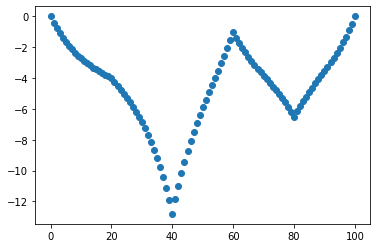

In [8]:
#Visualisation de la correction proposée

EY2 =  depth.mean() * np.ones(N-n) + np.dot(np.matrix.transpose(sigma_oz), np.dot(np.linalg.inv(sigma_o), depth - EO))

plt.scatter(np.arange(N), fusion(EY2,depth))
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

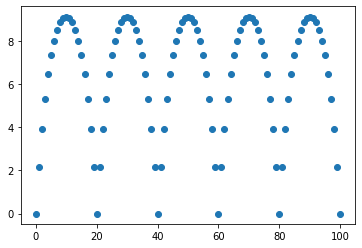

In [25]:
sigma_y = sigma_i - np.dot(np.matrix.transpose(sigma_oz), np.dot(np.linalg.inv(sigma_o),sigma_oz))

plt.scatter(np.arange(N), fusion(sigma_y.diagonal(),np.zeros(n)))
plt.show()

A mesure qu'on s'éloigne des points d'obervation, la variance pour une profondeur à une abscisse donnée augmente : cela traduit l'incertitude qui augmente à mesure qu'on s'éloigne des points d'observation.
Remarque : pour des raisons de cohérence intuitive, nous avons mis la "variance" à 0 au niveau des points d'observation

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

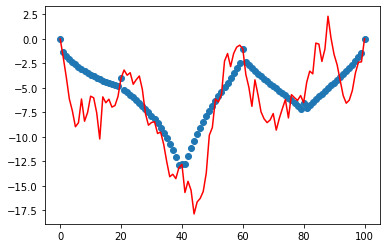

In [26]:
# Décomposition de Cholesky
R = np.linalg.cholesky(sigma_y)

"""
# Remarque : en exécutant le code ci-dessous, on se rend compte que la décomposition est très loin d'être parfaite...
print(np.dot(R,np.matrix.transpose(R))[0])
print(sigma_y[0])

"""

# Simulation d'un vecteur aléatoire T

def simulation_Y() :
    T = np.random.normal(size=N-n)

    # Calcul de Y

    return EY + np.dot(R,T)

Y = simulation_Y()

Z = fusion(Y,depth)

# Représentation

plt.scatter(np.arange(N), fusion(EY,depth))
plt.plot(np.arange(N), Z, color='red')
plt.show()


8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [27]:
def l(Z, Delta=Delta) :
    Delta2 = Delta * Delta
    L = 0
    p = Z.shape[0]-1
    for i in range(p) :
        L += np.sqrt(Delta2+(Z[i]-Z[i+1])**2)
    return L

L = l(Z)
print(L)

523.4463556905572


9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [28]:
def simulation_L() :
    Y = simulation_Y()
    Z = fusion(Y,depth)
    return l(Z)

simulations = [simulation_L() for i in range(100)]

print("Espérance conditionnelle simulée :", np.mean(simulations))
print("Espérance conditionnelle calculée :", l(fusion(EY,depth)))

Espérance conditionnelle simulée : 522.8249029434724
Espérance conditionnelle calculée : 502.4338471728241


Remarque : cette différence d'une vingtaine est extrêmement bizarre, d'autant que l'espérance simulée est très stable. Peut-être y a-t-il un problème à mettre en lien avec les résultats obtenus en question 5 ?

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

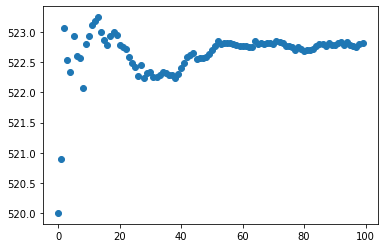

In [29]:
M = []
S = 0
for i in range(100) :
    S+=simulations[i]
    M.append(S/(i+1))

plt.scatter(np.arange(100),M)
plt.show()

On peut voir la convergence de la moyenne empirique, comme prévu par la loi des grands nombres.

11. Représenter l'histogramme des longueurs de câbles générées.

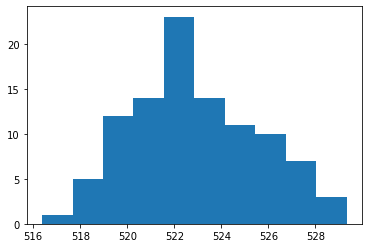

In [30]:
plt.hist(simulations)
plt.show()

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

In [31]:
# Intervalle de confiance expérimental : on prend les centiles
# (par exemple, les 3ème valeurs en partant de la fin et du début, cela fait même 96% mais on n'est pas à ça près en termes de précision vu que ça reste expérimental)

simulations.sort()
print("Intervalle de confiance expérimental :", simulations[2],",",simulations[-3])

# Autre méthode : ???

Intervalle de confiance expérimental : 518.1214489479015 , 528.0854818920321


13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [32]:
# On regarde quelle proportion des simulations a dépassé les 525 m

i = 0
while i<100 :
    if simulations[i]>525 : break
    i+=1

print("Estimation de la probabilité (en %) de dépasser les 525 m : ", 100-i)

Estimation de la probabilité (en %) de dépasser les 525 m :  23


14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

Espérance conditionnelle simulée : 523.7980353893785
Intervalle de confiance expérimental : 518.2871260244342 , 530.3620699350931
Estimation de la probabilité de dépasser les 525 m :  0.38


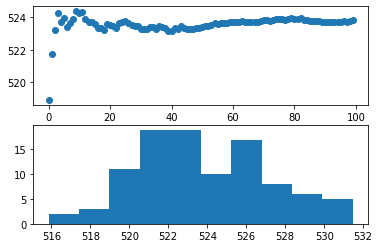

In [33]:
def grande_simulation(q=100) :
    simulations = [simulation_L() for i in range(q)]

    print("Espérance conditionnelle simulée :", np.mean(simulations))
    M = []
    S = 0
    for i in range(q) :
        S+=simulations[i]
        M.append(S/(i+1))
        
    fig, axes = plt.subplots(2, 1)

    axes[0].scatter(np.arange(q),M)
    axes[1].hist(simulations)
    
    simulations.sort()
    print("Intervalle de confiance expérimental :", simulations[round(0.025*q)],",",simulations[-1-round(0.025*q)])
    

    i = q-1
    while i>=0 :
        if simulations[i]<525 : break
        i-=1

    print("Estimation de la probabilité de dépasser les 525 m : ", (q-i-1)/q)
    plt.show()
    
    
grande_simulation(100)

Espérance conditionnelle simulée : 523.0650301875329
Intervalle de confiance expérimental : 517.7781430500551 , 529.0410224525675
Estimation de la probabilité de dépasser les 525 m :  0.258


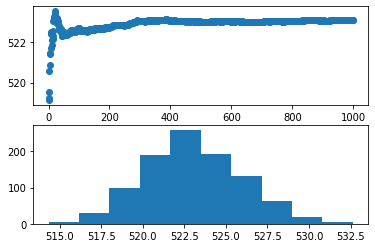

In [34]:
grande_simulation(1000)

Espérance conditionnelle simulée : 523.1357153445997
Intervalle de confiance expérimental : 517.5658796374356 , 529.4458582117179
Estimation de la probabilité de dépasser les 525 m :  0.2568


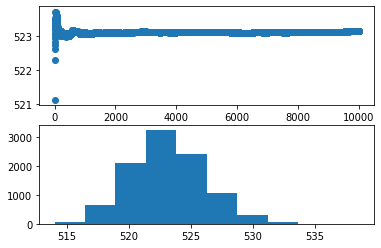

In [35]:
grande_simulation(10000)